In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

In [4]:
df = pd.read_csv('./Data/wine.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6497 non-null   float64
 1   1       6497 non-null   float64
 2   2       6497 non-null   float64
 3   3       6497 non-null   float64
 4   4       6497 non-null   float64
 5   5       6497 non-null   float64
 6   6       6497 non-null   float64
 7   7       6497 non-null   float64
 8   8       6497 non-null   float64
 9   9       6497 non-null   float64
 10  10      6497 non-null   float64
 11  11      6497 non-null   int64  
 12  12      6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [6]:
df.iloc[:, 12]

0       1
1       1
2       1
3       1
4       1
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: 12, Length: 6497, dtype: int64

In [7]:
# binary classification, muliti classification 두 가지 방식으로 nural network model을 만들고 
# train data로 학습시킨 후 test data로 accuracy를 평가하시오

In [8]:
y = df.iloc[:, 12].values
x = df.iloc[:, :12].values

In [10]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [9]:
y_oh = tf.keras.utils.to_categorical(y)

In [11]:
y_oh

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [31]:
# binary

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [13]:
x.shape

(6497, 12)

In [34]:
model = Sequential()
model.add(Dense(36, activation='relu', input_dim=12))
model.add(Dense(18, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 36)                468       
                                                                 
 dense_5 (Dense)             (None, 18)                666       
                                                                 
 dense_6 (Dense)             (None, 9)                 171       
                                                                 
 dense_7 (Dense)             (None, 1)                 10        
                                                                 
Total params: 1,315
Trainable params: 1,315
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [41]:
x_train.shape

(4872, 12)

In [42]:
y_train.shape

(4872,)

In [43]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [44]:
model.fit(x_train.astype(float), y_train, epochs=50, batch_size=20)

Epoch 1/50
244/244 [==============================] - 1s 847us/step - loss: 0.2216 - accuracy: 0.9208
Epoch 2/50
244/244 [==============================] - 0s 823us/step - loss: 0.1876 - accuracy: 0.9349
Epoch 3/50
244/244 [==============================] - 0s 816us/step - loss: 0.1734 - accuracy: 0.9419
Epoch 4/50
244/244 [==============================] - 0s 855us/step - loss: 0.1520 - accuracy: 0.9493
Epoch 5/50
244/244 [==============================] - 0s 846us/step - loss: 0.1369 - accuracy: 0.9530
Epoch 6/50
244/244 [==============================] - 0s 810us/step - loss: 0.1210 - accuracy: 0.9602
Epoch 7/50
244/244 [==============================] - 0s 840us/step - loss: 0.1244 - accuracy: 0.9589
Epoch 8/50
244/244 [==============================] - 0s 851us/step - loss: 0.1172 - accuracy: 0.9587
Epoch 9/50
244/244 [==============================] - 0s 823us/step - loss: 0.1074 - accuracy: 0.9665
Epoch 10/50
244/244 [==============================] - 0s 814us/step - loss: 0.099

In [45]:
model.evaluate(x_test, y_test)

51/51 [==============================] - 0s 698us/step - loss: 0.0595 - accuracy: 0.9822


[0.059461187571287155, 0.9821538329124451]

In [ ]:
# multiclassification

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y_oh)

In [16]:
model = Sequential()
model.add(Dense(36, activation='relu', input_dim=12))
model.add(Dense(18, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 36)                468       
                                                                 
 dense_1 (Dense)             (None, 18)                666       
                                                                 
 dense_2 (Dense)             (None, 9)                 171       
                                                                 
 dense_3 (Dense)             (None, 2)                 20        
                                                                 
Total params: 1,325
Trainable params: 1,325
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [18]:
model.fit(x_train.astype(float), y_train, epochs=50, batch_size=20)

Epoch 1/50
244/244 [==============================] - 0s 743us/step - loss: 0.1968 - accuracy: 0.9358
Epoch 2/50
244/244 [==============================] - 0s 729us/step - loss: 0.1654 - accuracy: 0.9423
Epoch 3/50
244/244 [==============================] - 0s 749us/step - loss: 0.1517 - accuracy: 0.9468
Epoch 4/50
244/244 [==============================] - 0s 748us/step - loss: 0.1386 - accuracy: 0.9530
Epoch 5/50
244/244 [==============================] - 0s 730us/step - loss: 0.1284 - accuracy: 0.9563
Epoch 6/50
244/244 [==============================] - 0s 725us/step - loss: 0.1132 - accuracy: 0.9612
Epoch 7/50
244/244 [==============================] - 0s 730us/step - loss: 0.1082 - accuracy: 0.9649
Epoch 8/50
244/244 [==============================] - 0s 721us/step - loss: 0.0924 - accuracy: 0.9692
Epoch 9/50
244/244 [==============================] - 0s 720us/step - loss: 0.0928 - accuracy: 0.9692
Epoch 10/50
244/244 [==============================] - 0s 723us/step - loss: 0.075

In [19]:
model.evaluate(x_test, y_test)

51/51 [==============================] - 0s 627us/step - loss: 0.0574 - accuracy: 0.9852


[0.057422250509262085, 0.9852307438850403]

In [20]:
model.save('./deep_model/wine_model.h5')

In [52]:
# model checkpointer

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y_oh)
model = Sequential()
model.add(Dense(36, activation='relu', input_dim=12))
model.add(Dense(18, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(2, activation='softmax'))
# model.summary()
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [26]:
import os

In [27]:
model_dir = './deep_model/model_check'
if not os.path.exists(model_dir):
    os.mkdir(model_dir)

In [28]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [29]:
modelpath = './deep_model/model_check/{epoch:02d}-{val_loss:4f}.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor='val_loss', verbose=1, \
                               save_best_only=True)

In [30]:
history = model.fit(x_train, y_train, validation_split=0.2, batch_size=50, epochs=100, \
                    callbacks=[checkpointer])

# val_loss 

Epoch 1/100
68/78 [=========================>....] - ETA: 0s - loss: 1.5522 - accuracy: 0.7321  
Epoch 1: val_loss improved from inf to 0.19177, saving model to ./deep_model/model_check\01-0.191766.hdf5
78/78 [==============================] - 0s 2ms/step - loss: 1.3800 - accuracy: 0.7572 - val_loss: 0.1918 - val_accuracy: 0.9374
Epoch 2/100
65/78 [========================>.....] - ETA: 0s - loss: 0.2154 - accuracy: 0.9255
Epoch 2: val_loss improved from 0.19177 to 0.18848, saving model to ./deep_model/model_check\02-0.188477.hdf5
78/78 [==============================] - 0s 1ms/step - loss: 0.2151 - accuracy: 0.9258 - val_loss: 0.1885 - val_accuracy: 0.9385
Epoch 3/100
55/78 [====================>.........] - ETA: 0s - loss: 0.2039 - accuracy: 0.9291
Epoch 3: val_loss improved from 0.18848 to 0.18585, saving model to ./deep_model/model_check\03-0.185848.hdf5
78/78 [==============================] - 0s 2ms/step - loss: 0.2073 - accuracy: 0.9284 - val_loss: 0.1858 - val_accuracy: 0.9395


78/78 [==============================] - 0s 1ms/step - loss: 0.0727 - accuracy: 0.9784 - val_loss: 0.0540 - val_accuracy: 0.9836
Epoch 27/100
65/78 [========================>.....] - ETA: 0s - loss: 0.0796 - accuracy: 0.9766
Epoch 27: val_loss improved from 0.05383 to 0.05076, saving model to ./deep_model/model_check\27-0.050764.hdf5
78/78 [==============================] - 0s 1ms/step - loss: 0.0769 - accuracy: 0.9774 - val_loss: 0.0508 - val_accuracy: 0.9856
Epoch 28/100
66/78 [========================>.....] - ETA: 0s - loss: 0.0730 - accuracy: 0.9794
Epoch 28: val_loss did not improve from 0.05076
78/78 [==============================] - 0s 1ms/step - loss: 0.0702 - accuracy: 0.9805 - val_loss: 0.0525 - val_accuracy: 0.9877
Epoch 29/100
66/78 [========================>.....] - ETA: 0s - loss: 0.0705 - accuracy: 0.9779
Epoch 29: val_loss improved from 0.05076 to 0.04976, saving model to ./deep_model/model_check\29-0.049762.hdf5
78/78 [==============================] - 0s 1ms/step - 

78/78 [==============================] - 0s 1ms/step - loss: 0.0507 - accuracy: 0.9861 - val_loss: 0.0415 - val_accuracy: 0.9867
Epoch 55/100
69/78 [=========================>....] - ETA: 0s - loss: 0.0546 - accuracy: 0.9846
Epoch 55: val_loss did not improve from 0.03683
78/78 [==============================] - 0s 1ms/step - loss: 0.0520 - accuracy: 0.9859 - val_loss: 0.0401 - val_accuracy: 0.9887
Epoch 56/100
66/78 [========================>.....] - ETA: 0s - loss: 0.0522 - accuracy: 0.9858
Epoch 56: val_loss did not improve from 0.03683
78/78 [==============================] - 0s 1ms/step - loss: 0.0497 - accuracy: 0.9864 - val_loss: 0.0485 - val_accuracy: 0.9846
Epoch 57/100
70/78 [=========================>....] - ETA: 0s - loss: 0.0521 - accuracy: 0.9854
Epoch 57: val_loss did not improve from 0.03683
78/78 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9856 - val_loss: 0.0406 - val_accuracy: 0.9867
Epoch 58/100
66/78 [========================>.....] 

68/78 [=========================>....] - ETA: 0s - loss: 0.0452 - accuracy: 0.9888
Epoch 84: val_loss did not improve from 0.03526
78/78 [==============================] - 0s 1ms/step - loss: 0.0422 - accuracy: 0.9892 - val_loss: 0.0417 - val_accuracy: 0.9887
Epoch 85/100
67/78 [========================>.....] - ETA: 0s - loss: 0.0411 - accuracy: 0.9881
Epoch 85: val_loss did not improve from 0.03526
78/78 [==============================] - 0s 1ms/step - loss: 0.0416 - accuracy: 0.9879 - val_loss: 0.0436 - val_accuracy: 0.9887
Epoch 86/100
67/78 [========================>.....] - ETA: 0s - loss: 0.0426 - accuracy: 0.9881
Epoch 86: val_loss did not improve from 0.03526
78/78 [==============================] - 0s 1ms/step - loss: 0.0433 - accuracy: 0.9879 - val_loss: 0.0520 - val_accuracy: 0.9887
Epoch 87/100
67/78 [========================>.....] - ETA: 0s - loss: 0.0429 - accuracy: 0.9896
Epoch 87: val_loss did not improve from 0.03526
78/78 [==============================] - 0s 1ms/st

In [31]:
history.history

{'loss': [1.3800119161605835,
  0.2151135951280594,
  0.20730750262737274,
  0.20454105734825134,
  0.2014961838722229,
  0.19945697486400604,
  0.1963517963886261,
  0.19633381068706512,
  0.1904430091381073,
  0.18693332374095917,
  0.17864049971103668,
  0.16896826028823853,
  0.15689192712306976,
  0.1418611705303192,
  0.12228233367204666,
  0.11086142063140869,
  0.10871531814336777,
  0.10257390886545181,
  0.09346264600753784,
  0.0958344116806984,
  0.08833812922239304,
  0.0860423594713211,
  0.08778327703475952,
  0.0817047730088234,
  0.0756705105304718,
  0.0726509764790535,
  0.07686429470777512,
  0.0701838880777359,
  0.06769350171089172,
  0.06551969796419144,
  0.06755256652832031,
  0.06532614678144455,
  0.06827995181083679,
  0.06406676769256592,
  0.06975152343511581,
  0.05874815955758095,
  0.060868918895721436,
  0.05904177948832512,
  0.05756531283259392,
  0.06784600019454956,
  0.057642851024866104,
  0.06134672835469246,
  0.054174311459064484,
  0.05263222

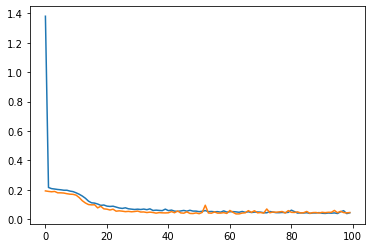

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# val_loss가 더 크면 과적합

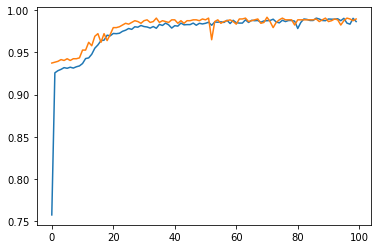

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [73]:
# early stopping

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y_oh)
model = Sequential()
model.add(Dense(36, activation='relu', input_dim=12))
model.add(Dense(18, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(2, activation='softmax'))
# model.summary()
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [37]:
from tensorflow.keras.callbacks import EarlyStopping

In [38]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=7)

In [39]:
modelpath = './deep_model/model_check/{epoch:02d}-{val_loss:4f}.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor='val_loss', verbose=1, \
                               save_best_only=True)

In [40]:
history = model.fit(x_train, y_train, validation_split=0.2, batch_size=50, epochs=200, \
                    callbacks=[checkpointer, early_stopping_callback])

Epoch 1/200
69/78 [=========================>....] - ETA: 0s - loss: 0.3494 - accuracy: 0.8701 
Epoch 1: val_loss improved from inf to 0.22379, saving model to ./deep_model/model_check\01-0.223793.hdf5
78/78 [==============================] - 0s 2ms/step - loss: 0.3404 - accuracy: 0.8761 - val_loss: 0.2238 - val_accuracy: 0.9374
Epoch 2/200
66/78 [========================>.....] - ETA: 0s - loss: 0.2213 - accuracy: 0.9333
Epoch 2: val_loss improved from 0.22379 to 0.17235, saving model to ./deep_model/model_check\02-0.172350.hdf5
78/78 [==============================] - 0s 1ms/step - loss: 0.2232 - accuracy: 0.9307 - val_loss: 0.1724 - val_accuracy: 0.9477
Epoch 3/200
63/78 [=======================>......] - ETA: 0s - loss: 0.1910 - accuracy: 0.9340
Epoch 3: val_loss improved from 0.17235 to 0.15804, saving model to ./deep_model/model_check\03-0.158035.hdf5
78/78 [==============================] - 0s 1ms/step - loss: 0.1937 - accuracy: 0.9323 - val_loss: 0.1580 - val_accuracy: 0.9477
E

Epoch 27/200
65/78 [========================>.....] - ETA: 0s - loss: 0.0825 - accuracy: 0.9729
Epoch 27: val_loss improved from 0.06570 to 0.06453, saving model to ./deep_model/model_check\27-0.064533.hdf5
78/78 [==============================] - 0s 1ms/step - loss: 0.0812 - accuracy: 0.9741 - val_loss: 0.0645 - val_accuracy: 0.9754
Epoch 28/200
66/78 [========================>.....] - ETA: 0s - loss: 0.0780 - accuracy: 0.9748
Epoch 28: val_loss did not improve from 0.06453
78/78 [==============================] - 0s 1ms/step - loss: 0.0769 - accuracy: 0.9756 - val_loss: 0.1454 - val_accuracy: 0.9538
Epoch 29/200
66/78 [========================>.....] - ETA: 0s - loss: 0.0707 - accuracy: 0.9794
Epoch 29: val_loss did not improve from 0.06453
78/78 [==============================] - 0s 1ms/step - loss: 0.0746 - accuracy: 0.9792 - val_loss: 0.0717 - val_accuracy: 0.9764
Epoch 30/200
65/78 [========================>.....] - ETA: 0s - loss: 0.0696 - accuracy: 0.9769
Epoch 30: val_loss imp

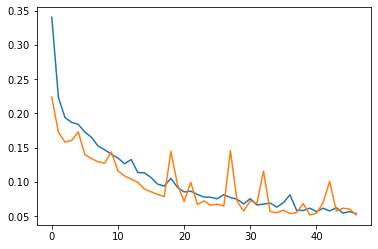

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

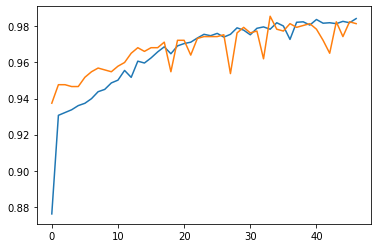

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [43]:
model.evaluate(x_test, y_test)

51/51 [==============================] - 0s 616us/step - loss: 0.0885 - accuracy: 0.9754


[0.08850596100091934, 0.9753845930099487]